In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_excel('../data/income2.xlsx')
df.head()

,Name,Age,Income (Thousands $)
0,Rob,29,45
1,Andrea,50,80
2,Mohan,35,52
3,Michael,32,41
4,Kory,36,87


<Axes: xlabel='Age', ylabel='Income (Thousands $)'>

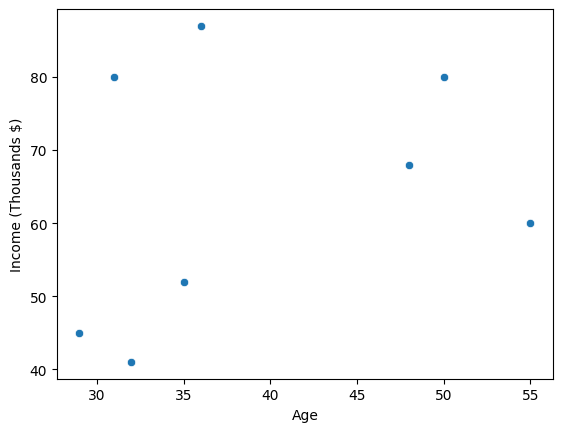

In [2]:
sns.scatterplot(df,x='Age',y='Income (Thousands $)')

In [3]:
from sklearn.cluster import AgglomerativeClustering

aggc = AgglomerativeClustering(n_clusters=3,linkage='average')
aggc.fit(df[['Age','Income (Thousands $)']])
aggc.labels_

array([1, 0, 1, 1, 2, 0, 2, 0])

<Axes: xlabel='Age', ylabel='Income (Thousands $)'>

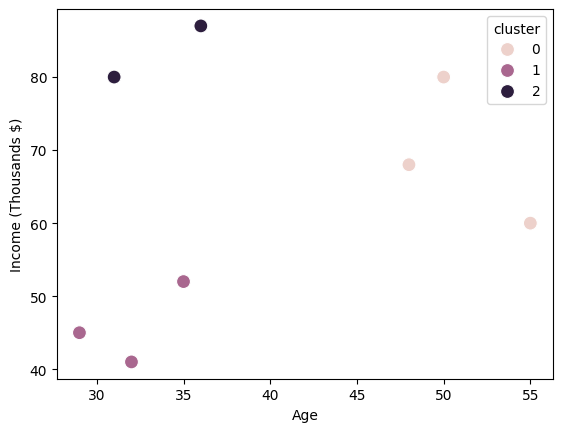

In [7]:
df['cluster'] = aggc.labels_

sns.scatterplot(df,x='Age',y='Income (Thousands $)',s=100,hue='cluster')

In [ ]:
# ! pip install scipy


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: pip install --upgrade pip


In [9]:
from scipy.cluster.hierarchy import dendrogram,linkage,fcluster

x = df[['Age','Income (Thousands $)']]
z = linkage(x,method='average')
z

array([[ 0.        ,  3.        ,  5.        ,  2.        ],
       [ 4.        ,  6.        ,  8.60232527,  2.        ],
       [ 2.        ,  8.        , 10.31064935,  3.        ],
       [ 5.        ,  7.        , 10.63014581,  2.        ],
       [ 1.        , 11.        , 16.39052659,  3.        ],
       [ 9.        , 12.        , 23.69824661,  5.        ],
       [10.        , 13.        , 33.65863823,  8.        ]])

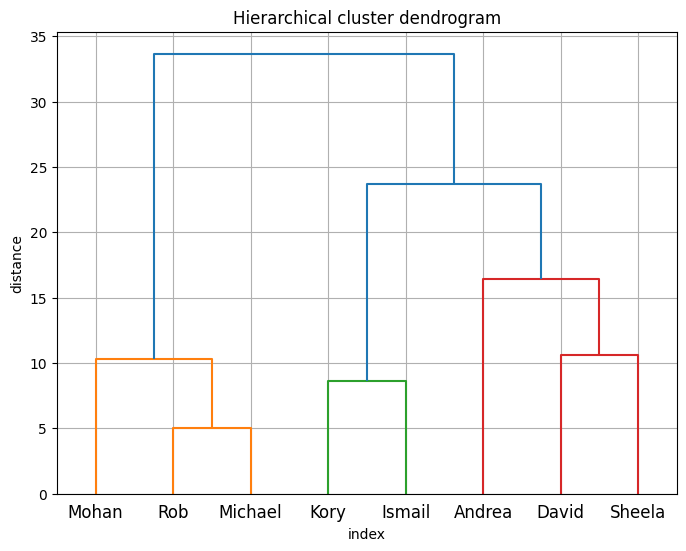

In [11]:
plt.figure(figsize=(8,6))
plt.title('Hierarchical cluster dendrogram')
dendrogram(z,labels=df['Name'].values)
plt.xlabel('index')
plt.ylabel('distance')
plt.grid()
plt.show()

    Distance between rob and michael

In [12]:
np.sqrt((32-29)**2 + (45-41)**2)

np.float64(5.0)

In [13]:
cluster = fcluster(z,t=3,criterion='maxclust')

In [14]:
cluster

array([1, 3, 1, 1, 2, 3, 2, 3], dtype=int32)

In [15]:
df['cluster2'] = cluster

<Axes: xlabel='Age', ylabel='Income (Thousands $)'>

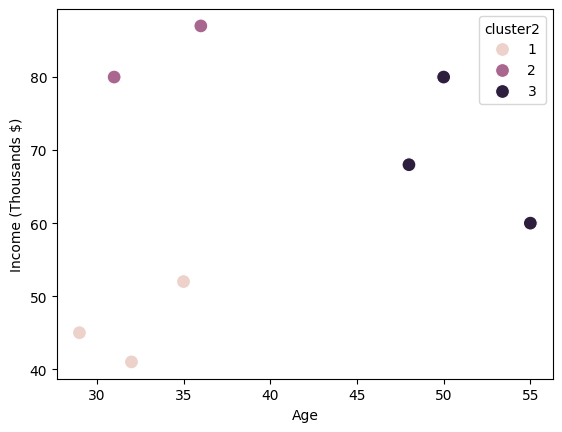

In [16]:
sns.scatterplot(df,x='Age',y='Income (Thousands $)',s=100,hue='cluster2')